In [1]:
# importing important libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

import seaborn as sns
sns.set(style="darkgrid")

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("weatherAUS.csv")

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
# Missing values treatment

In [5]:
# Detecting the missing values from dataset

In [6]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [7]:
df.isnull().sum() / df.shape[0]

Date             0.000000
Location         0.000000
MinTemp          0.010209
MaxTemp          0.008669
Rainfall         0.022419
Evaporation      0.431665
Sunshine         0.480098
WindGustDir      0.070989
WindGustSpeed    0.070555
WindDir9am       0.072639
WindDir3pm       0.029066
WindSpeed9am     0.012148
WindSpeed3pm     0.021050
Humidity9am      0.018246
Humidity3pm      0.030984
Pressure9am      0.103568
Pressure3pm      0.103314
Cloud9am         0.384216
Cloud3pm         0.408071
Temp9am          0.012148
Temp3pm          0.024811
RainToday        0.022419
RainTomorrow     0.022460
dtype: float64

In [8]:
# feautures which are missing more than 10%
feature_missing_more_than_10p = [x[1] for x in zip((df.isnull().sum() / df.shape[0]), (df.isnull().sum() / df.shape[0]).index) if x[0] > 0.10]
feature_missing_more_than_10p

['Evaporation',
 'Sunshine',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm']

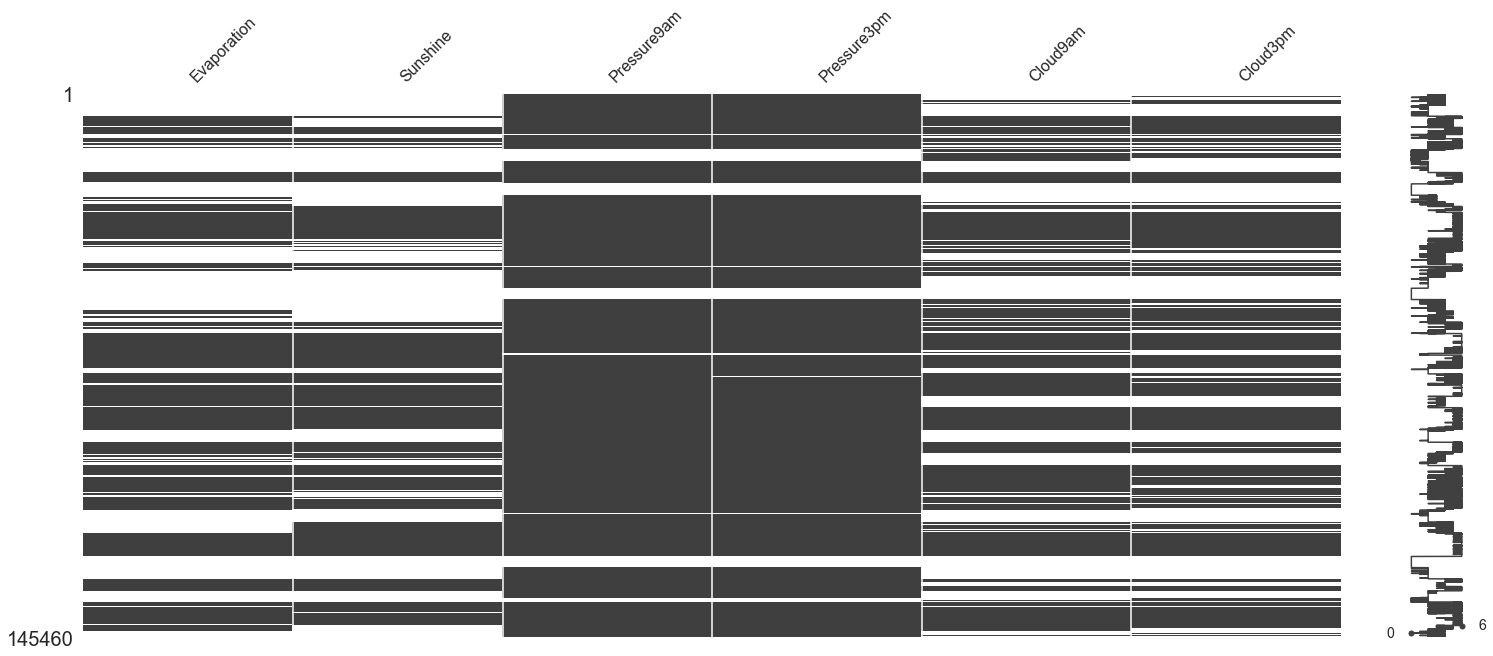

In [9]:
import missingno as msno
msno.matrix(df[feature_missing_more_than_10p])
plt.show()

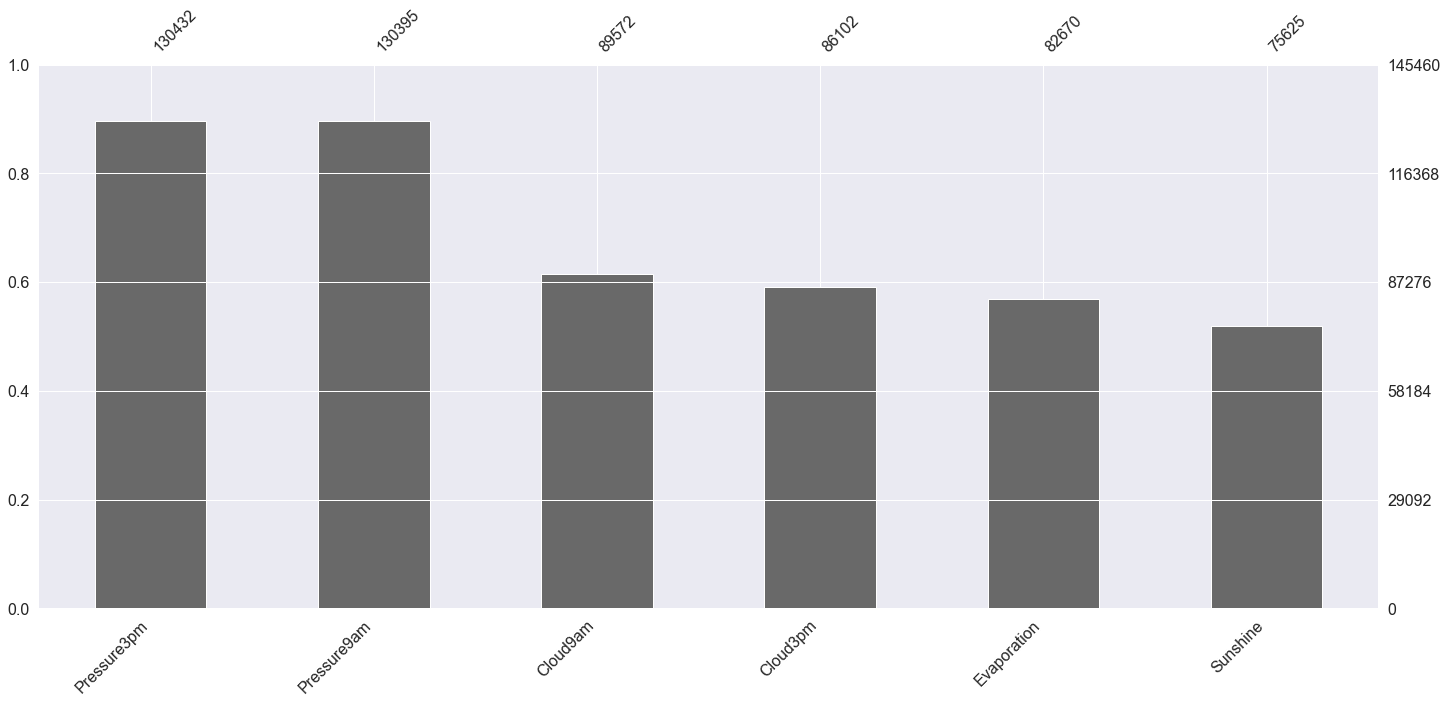

In [10]:
msno.bar(df[feature_missing_more_than_10p], sort= 'descending')
plt.show()

In [11]:
# From the above plot, we can see that Cloud9am, Cloud3pm, Evaporation, and Sunshine have a lot of missing values.

In [12]:
# filling missing values

In [13]:
# As of now we know that RainTommarow is the target for our analysis, 
# so to reduce wrong result at end of target we are dropping rows where RainTommarow is missing which is 2.246 percent
df = df.dropna(subset=['RainTomorrow'])

In [14]:
# getting the names of features which are categorical in nature
categorical = [i for i in df.columns if df[i].dtype=='object']
categorical

['Date',
 'Location',
 'WindGustDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'RainTomorrow']

In [15]:
# getting the names of features which are numerical and continues in nature
numerical = [i for i in df.columns if df[i].dtype=='float64']
numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm']

In [16]:
# treating categorical variables using mode method
for i in categorical:
    df[i].fillna(df[i].mode()[0], inplace = True)

In [17]:
df[categorical].isnull().sum()

Date            0
Location        0
WindGustDir     0
WindDir9am      0
WindDir3pm      0
RainToday       0
RainTomorrow    0
dtype: int64

In [18]:
# treating numerical or continues variables using temporal interpolation method
df.index = pd.to_datetime(df.Date)
df[numerical] = df[numerical].interpolate(method = 'time', limit_direction = "both")

In [19]:
# reseting the index for further analysis
df = df.drop('Date', axis = 1).reset_index()

In [20]:
df[numerical].isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

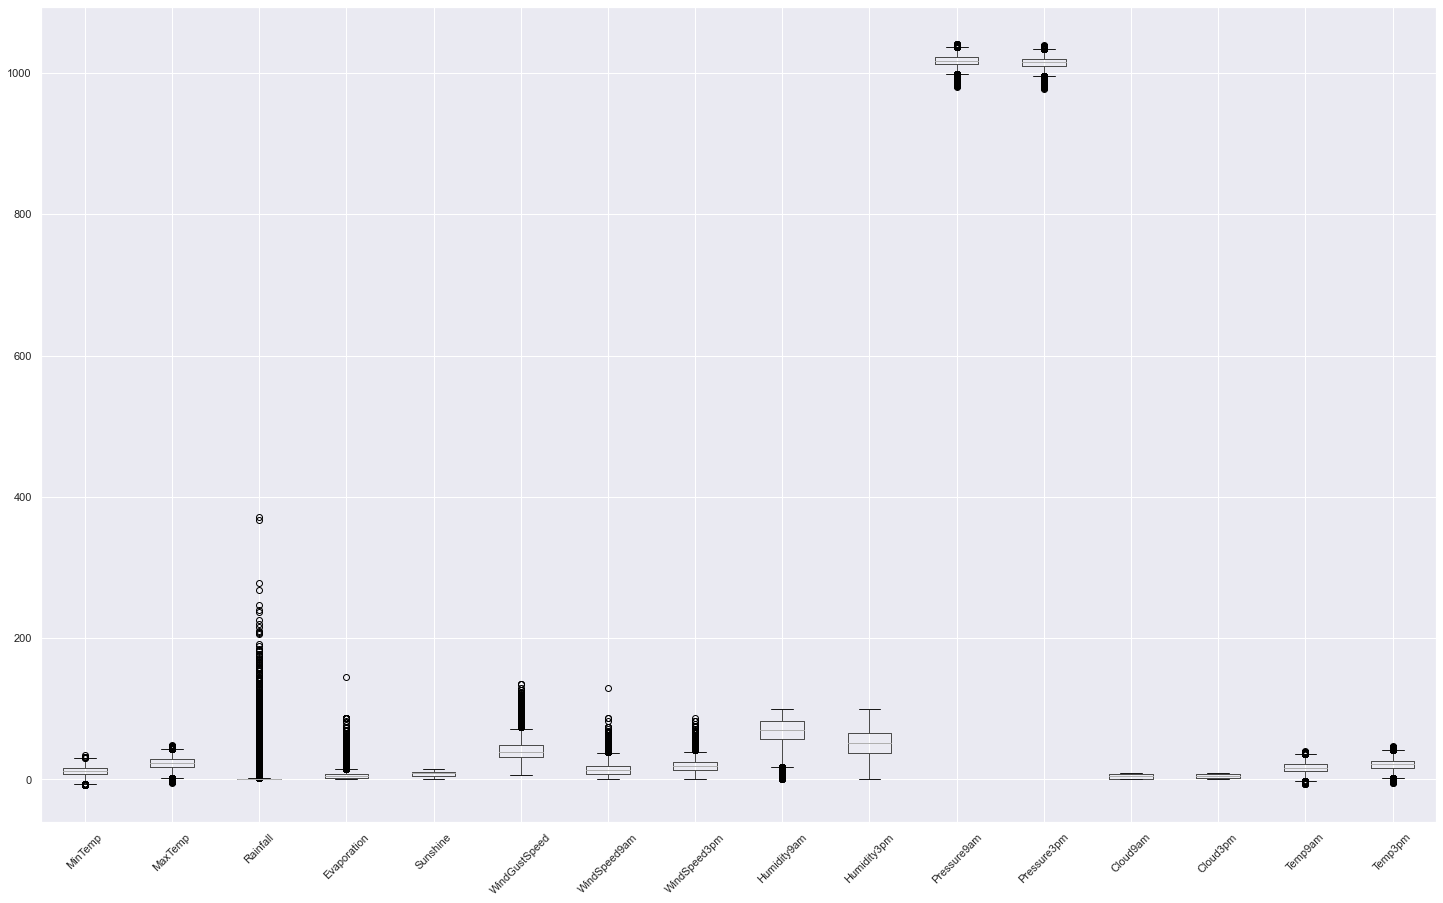

In [21]:
plt.figure(figsize=[25,15])
df.boxplot(column= ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm'])
plt.xticks(rotation=45)
plt.show()

In [22]:
# we can treat outliers by taking data under 99 percentile which is approx under 3 standard deviation and replace above that data with mean.
for i in numerical:
    df[i].loc[df[df[i] >= np.percentile(df[i], 99)].index] = df[df[i] < np.percentile(df[i], 99)][i].mean()

In [23]:
# checking dist again after treating outliers.
df[numerical].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000
mean,12.037551,23.030964,1.723701,5.294807,7.505338,39.380960,13.627192,18.263115,68.218437,51.009372,1017.477008,1015.088791,3.700765,3.878284,16.825807,21.501509
std,6.227580,6.855086,4.660118,3.365781,3.726988,12.473667,8.196389,8.145592,18.530115,20.228230,6.860089,6.794321,2.424635,2.305631,6.287308,6.671795
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.000000,1010.500000,1.000000,2.000000,12.300000,16.600000
50%,12.000000,22.600000,0.000000,4.800000,8.300000,39.000000,13.000000,18.263115,69.000000,51.009372,1017.500000,1015.100000,3.700765,3.878284,16.700000,21.100000
75%,16.600000,28.000000,0.800000,7.400000,10.500000,46.000000,19.000000,24.000000,82.000000,65.000000,1022.200000,1019.800000,6.000000,6.000000,21.300000,26.200000
max,25.700000,40.000000,37.200000,18.200000,13.300000,78.000000,37.000000,41.000000,99.000000,97.000000,1033.900000,1031.500000,7.000000,7.000000,31.100000,38.400000


In [24]:
# EDA

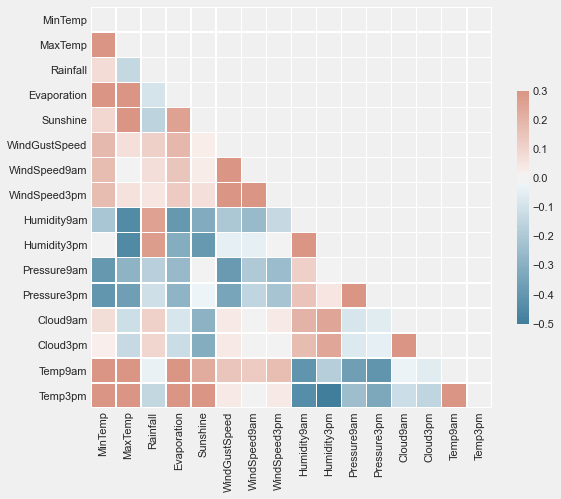

In [25]:
plt.style.use('fivethirtyeight')
# Compute the correlation matrix
corr = df.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

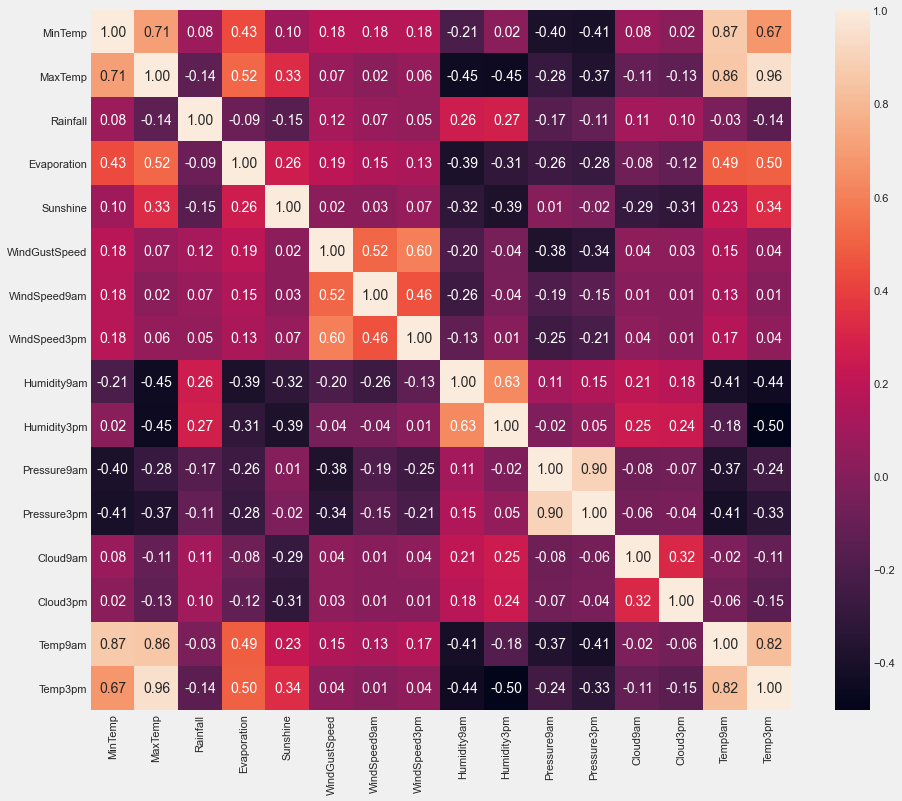

In [26]:
plt.figure(figsize=(14,12))
ax = sns.heatmap(corr, square=True, annot=True, fmt='.2f')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)          
plt.show()

In [27]:
# From above correlation map we can see that:

# MinTemp and MaxTemp features are highly correlated (correlation coefficient = 0.73).
# MinTemp and Temp9am features are highly correlated (correlation coefficient = 0.90).
# MinTemp and Temp3pm features are highly correlated (correlation coefficient = 0.70).
# MaxTemp and Temp9am features are highly correlated (correlation coefficient = 0.88).
# MaxTemp and Temp3pm features are highly correlated (correlation coefficient = 0.97).
# Pressure9am and Pressure3pm features are highly correlated (correlation coefficient = 0.96).
# Temp9am and Temp3pm features are highly correlated (correlation coefficient = 0.85).

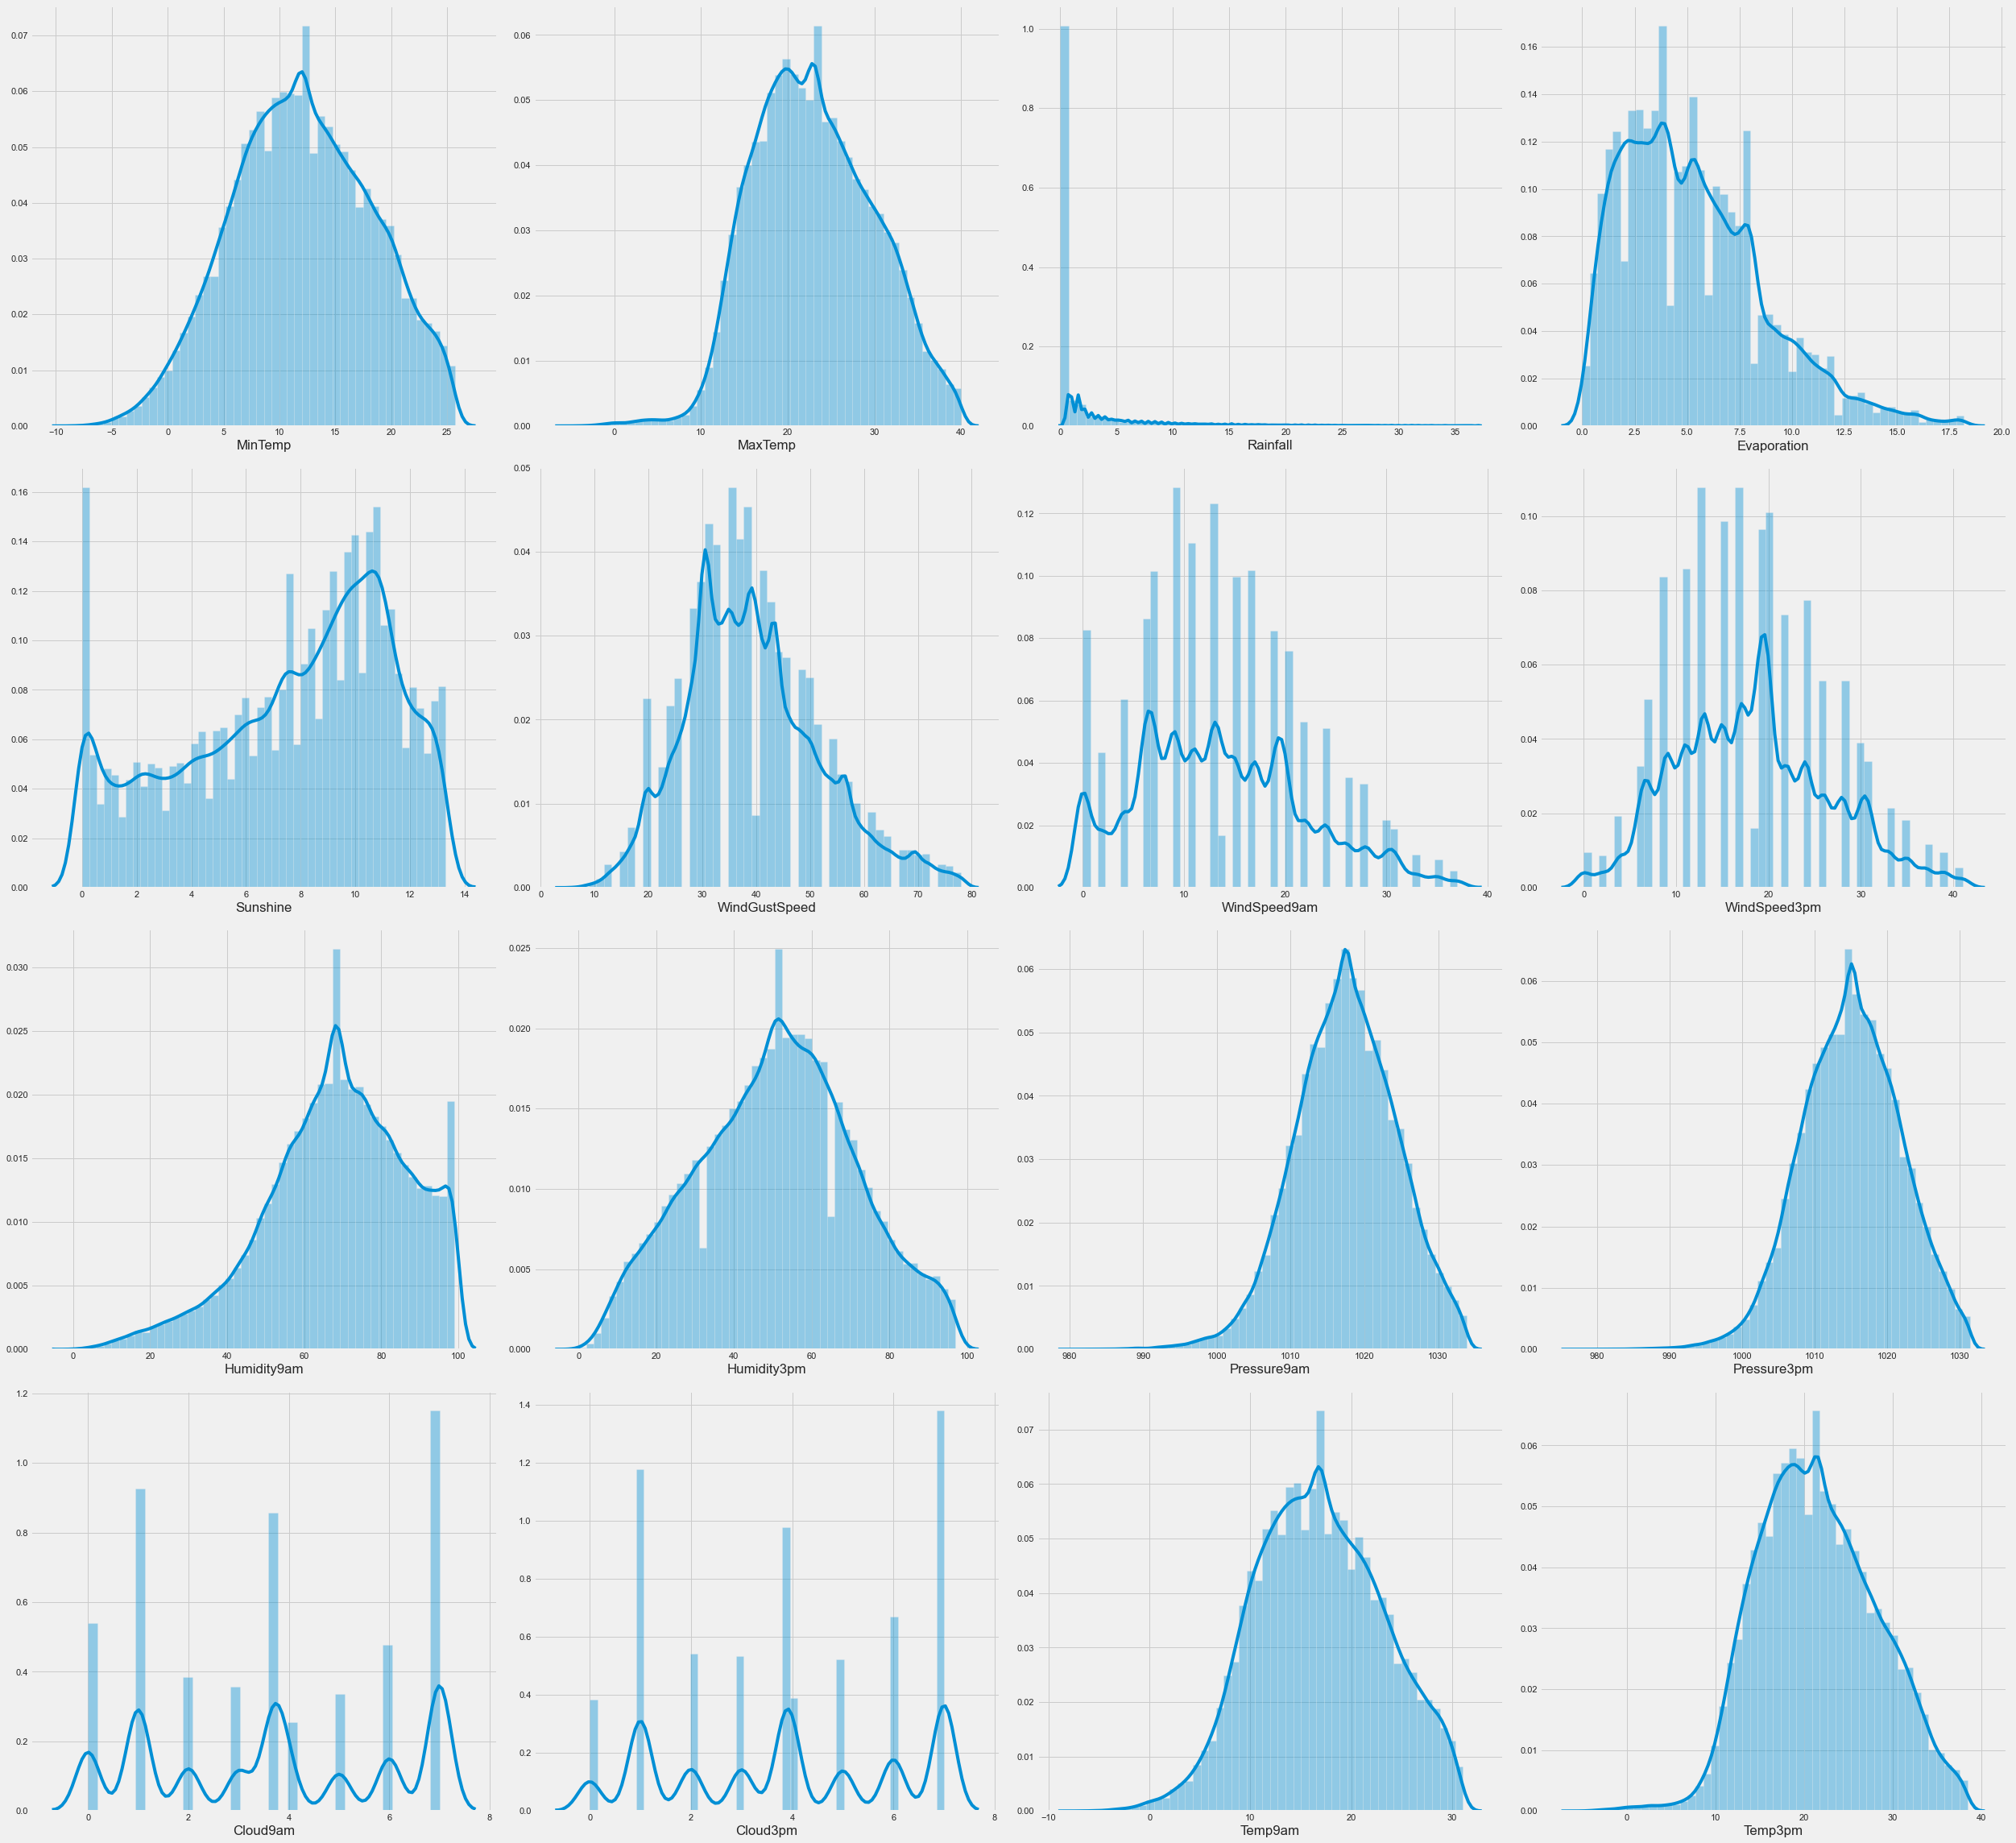

In [28]:
#  plot Numerical Data
a = 4  # number of rows
b = 4  # number of columns
c = 1  # initialize plot counter
fig = plt.figure(figsize=(35,32))
for i in df:
    if df[i].dtype=='float64':
        plt.subplot(a, b, c)
        sns.distplot(df[i])
        c = c+1
    else:
        continue
plt.tight_layout()
plt.show()

In [29]:
#From above distribution plot, we can see that certain features are same around few parts of x-axis like WindSpeed9am and WindSpeed3pm is same at 15-20 etc.

In [30]:
# checking some features relation with datetime

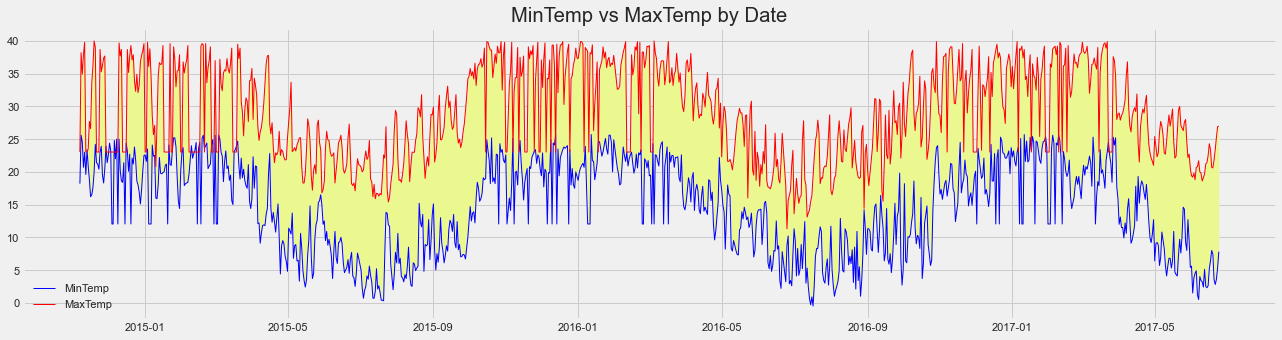

In [31]:
df_dateplot = df.iloc[-950:,:]
plt.figure(figsize=[20,5])
plt.plot(df_dateplot['Date'],df_dateplot['MinTemp'],color='blue',linewidth=1, label= 'MinTemp')
plt.plot(df_dateplot['Date'],df_dateplot['MaxTemp'],color='red',linewidth=1, label= 'MaxTemp')
plt.fill_between(df_dateplot['Date'],df_dateplot['MinTemp'],df_dateplot['MaxTemp'], facecolor = '#EBF78F')
plt.title('MinTemp vs MaxTemp by Date')
plt.legend(loc='lower left', frameon=False)
plt.show()

In [32]:
#  Above plot shows that the MinTemp and MaxTemp relatively increases and decreases every year.
#  The weather conditions are always opposite in the two hemispheres. As, the Australia is situated in the southern hemisphere. The seasons are bit different.
#  As you can see that, December to February is summer; March to May is autumn; June to August is winter; and September to November is spring.

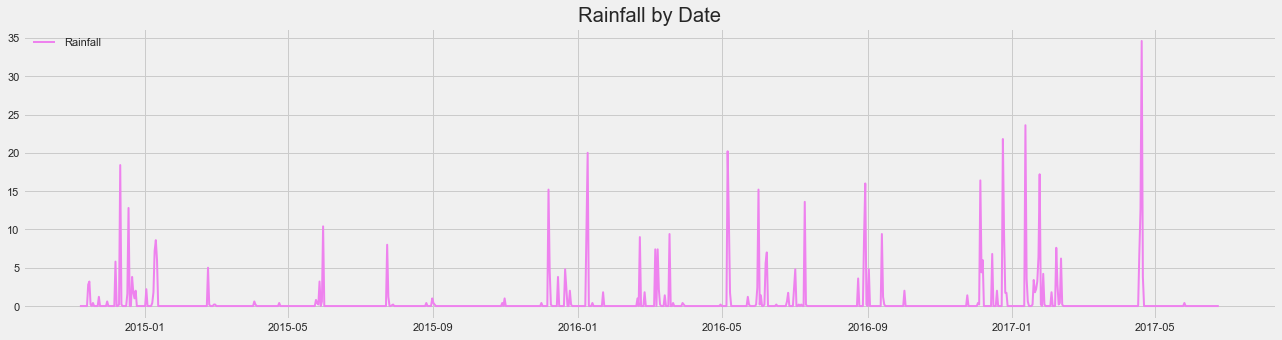

In [33]:
df_dateplot = df.iloc[-950:,:]
plt.figure(figsize=[20,5])
plt.plot(df_dateplot['Date'],df_dateplot['Rainfall'],color='violet', linewidth=2, label= 'Rainfall')
plt.legend(loc='upper left', frameon=False)
plt.title('Rainfall by Date')
plt.show()

In [34]:
# Being situated in southern hemisphere, the majority of rainfall occurs between December and March.
# As you can see from above plot, we can see that Dec-Jan does get a lot of rainfall but there are months like Jun-Jul when rainfall occurs too.

In [35]:
# extracting time features from Date
df['Date'] = pd.to_datetime(df['Date'])

df['day'] = df['Date'].dt.day
df['month'] = df['Date'].dt.month

In [36]:
# selecting dependant and independant features
features_x = ['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'day', 'month']

features_y = ['RainTomorrow']

In [37]:
from category_encoders import target_encoder
from sklearn.preprocessing import LabelEncoder

In [38]:
te = target_encoder.TargetEncoder()
lbl = LabelEncoder()

In [39]:
X = df[features_x]
y = df[features_y]

In [40]:
# convering target to 0, 1 using label encoder
y = lbl.fit_transform(y)

In [41]:
y = pd.Series(y)

In [42]:
# convering all categorical features numerical using target encoding
X = te.fit_transform(X, y)

In [43]:
# treating imbalance data

In [44]:
# checking the target
df.RainTomorrow.value_counts() / df.shape[0]

No     0.775819
Yes    0.224181
Name: RainTomorrow, dtype: float64

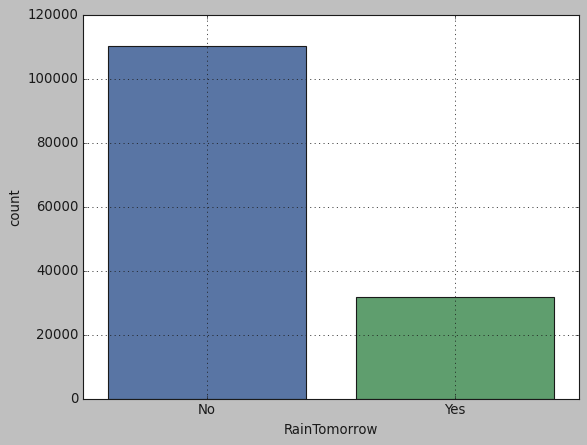

In [45]:
plt.style.use("classic")
sns.countplot(data=df, x="RainTomorrow")
plt.grid(linewidth = 0.7)
plt.show()

In [46]:
# as we can see from above graph that data is unbalnced out two classes one class is No is around 77% and 22% of Yes class.
# we have balance the dataset so that our model will not get biased to one class

In [47]:
# to balance dataset we will use oversampling technique
from imblearn.over_sampling import SMOTE
oversample = SMOTE()

X, y = oversample.fit_resample(X, y)

In [48]:
X, y = oversample.fit_resample(X, y)

In [49]:
# now we can see that two classes have same number of readings.
y.value_counts()

1    110316
0    110316
dtype: int64

In [50]:
# spliting the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.22, random_state=42)

In [51]:
# training model and evaluation it

In [52]:
acc_model = {}

In [53]:
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators= 1000)

In [ ]:
model.fit(X_train, y_train)

In [ ]:
pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
accuracy_score(y_test, pred)

In [ ]:
confusion_matrix(y_test, pred)

In [ ]:
f1_score(y_test, pred)

In [ ]:
acc_model['model'] = {"f1_score": f1_score(y_test, pred), 
                      "acc": accuracy_score(y_test, pred),
                     "no of features": X_train.shape[1]}

In [ ]:
feature_importance = pd.DataFrame({"features":X.columns, "importance": model.feature_importances_})

In [ ]:
feature_importance = feature_importance.sort_values(by='importance', ascending = False, ignore_index = True)

In [ ]:
sns.barplot(feature_importance.importance, feature_importance.features)
plt.show()

In [ ]:
# as we can see that 'month', 'Humidity9am', 'MinTemp', 'Evaporation', 'Temp3pm', 'Temp9am', 'MaxTemp', 'Pressure9am', 'day' has very low importance.
# So that we will try retraining model2 with removing those features and see the changes

In [ ]:
te = target_encoder.TargetEncoder()
lbl = LabelEncoder()

X_ = df[features_x]
y_ = df[features_y]

In [ ]:
X_.drop(list(feature_importance.loc[14:].features.values), axis  = 1, inplace = True)

In [ ]:
y_ = lbl.fit_transform(y_)

y_ = pd.Series(y_)
X_ = te.fit_transform(X_, y_)

In [ ]:
# to balance dataset we will use oversampling technique
from imblearn.over_sampling import SMOTE
oversample = SMOTE()

X_, y_ = oversample.fit_resample(X_, y_)

In [ ]:
X_train_new, X_test_new, y_train, y_test = train_test_split(X_, y_, test_size=0.22, random_state=42)

In [ ]:
model2 = XGBClassifier(n_estimators= 1000)

In [ ]:
model2.fit(X_train_new, y_train)

In [ ]:
pred = model2.predict(X_test_new)

In [ ]:
accuracy_score(y_test, pred)

In [ ]:
confusion_matrix(y_test, pred)

In [ ]:
f1_score(y_test, pred)

In [ ]:
acc_model['model2'] = {"f1_score": f1_score(y_test, pred),
                       "acc": accuracy_score(y_test, pred),
                      "no of features": X_train_new.shape[1]
                      }

In [ ]:
feature_importance = pd.DataFrame({"features":new_X.columns, 
                                   "importance": model2.feature_importances_})

In [ ]:
feature_importance = feature_importance.sort_values(by='importance', ascending = False, ignore_index = True)

In [ ]:
sns.barplot(feature_importance.importance, feature_importance.features)
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

In [ ]:
lg.fit(X_train_new, y_train)

In [ ]:
pred_lg = lg.predict(X_test_new)

In [ ]:
accuracy_score(y_test, pred_lg)

In [ ]:
confusion_matrix(y_test, pred_lg)

In [ ]:
f1_score(y_test, pred_lg)

In [ ]:
acc_model['lg'] = {"f1_score": f1_score(y_test, pred_lg),
                   "acc": accuracy_score(y_test, pred_lg), 
                   "no of features": X_train_new.shape[1]}

In [ ]:
# model selection

In [ ]:
models_acc = pd.DataFrame([acc_model[x] for x in acc_model.keys()])
models_acc['model'] = acc_model.keys()

In [ ]:
models_acc

In [ ]:
# from above table we can see that model2 to has good accuracy and less features than model, So we can say that model2 is less
# complex to manage and deploy than model1 and here we don't loose on acc also. So we select model2 out of three models.

In [ ]:
# saving model and other objects used in preprocessing..
import pickle
pickle.dump(model2, open("model.dat", "wb"))

In [ ]:
pickle.dump(te, open("target_encoder.dat", "wb"))

In [ ]:
pickle.dump(lbl, open("label_encoder.dat", "wb"))